# **Random Forest**

Es una evolución del algoritmo de árbol de decisión, ya que, utiliza combinaciones de árboles donde, cada árbol selecciona una clase y posteriormente combina las decisiones que debe tomar con el objetivo de seleccionar una única respuesta.

Se destaca por su uso en bases de datos robustas.

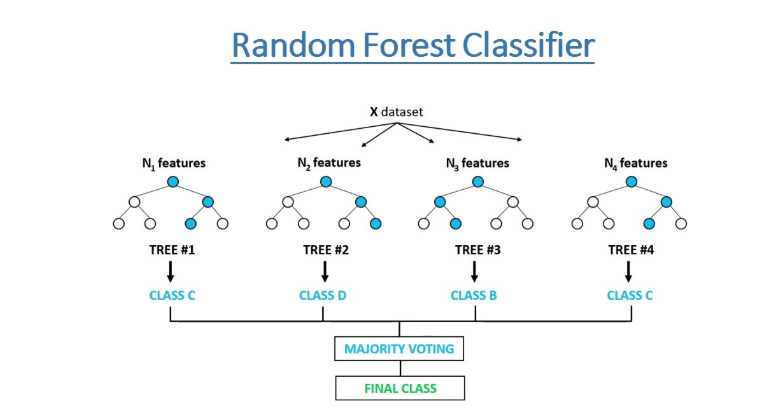

In [ ]:
#Numpy:  librería de Python especializada en el cálculo numérico y el análisis de datos.
import numpy as np

#Pandas: librería de Python especializada en el manejo y análisis de estructuras de datos.
import pandas as pd

#Matplotlib: librería de Python especializada en la creación de gráficos en dos dimensiones.
import matplotlib.pyplot as plt

#Seaborn: librería para Python que permite generar fácilmente elegantes gráficos.
import seaborn as sns

#Scikit-learn: biblioteca de Python ampliamente utilizada para el machine learning.
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataEMG = pd.read_csv('/content/drive/MyDrive/IA/Investigacion /EMG/emg_features_optimized.csv')
dataEMG

,Media,Varianza,Desviacion,Rms,IEMG,LongitudFO,Estado
0,-0.000006,1.557382e-04,0.012480,0.012467,4.276611,1.011475,1
1,0.000046,1.556705e-04,0.012477,0.012464,4.273682,1.009521,1
2,0.000068,1.556433e-04,0.012476,0.012463,4.269775,1.010742,1
3,0.000062,1.556529e-04,0.012476,0.012464,4.271729,1.009521,1
4,0.000019,1.558645e-04,0.012485,0.012472,4.284912,1.015381,1
...,...,...,...,...,...,...,...
39560,-0.000307,1.114762e-06,0.001056,0.001098,0.390869,0.293457,0
39561,-0.000326,1.035173e-06,0.001017,0.001067,0.381104,0.277588,0
39562,-0.000246,1.163123e-06,0.001078,0.001105,0.407715,0.280029,0
39563,-0.000379,1.073104e-06,0.001036,0.001102,0.396973,0.304443,0


In [ ]:
x = dataEMG.drop('Cluster', axis = 1)

In [ ]:
y = dataEMG['C']

Librerias A Importar

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1601)

Libreria Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest = RandomForestClassifier()

In [ ]:
randomforest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
predicciones = randomforest.predict(x_test)

In [ ]:
predicciones

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test
x_test

,Media,Varianza,Desviacion,Rms,IEMG,LongitudFO
15108,0.002268,1.922047e-02,0.138638,0.138518,55.820557,12.250732
38429,-0.001159,4.534007e-04,0.021293,0.021303,8.859863,1.601807
26153,-0.000431,9.565601e-07,0.000978,0.001068,0.368652,0.295166
33159,-0.005029,2.130537e-05,0.004616,0.006823,2.777344,0.509766
12626,0.000191,4.821509e-04,0.021958,0.021937,6.846191,1.474365
...,...,...,...,...,...,...
19226,0.000113,1.076995e-06,0.001038,0.001043,0.386963,0.324463
18113,0.000182,5.859843e-05,0.007655,0.007649,2.378662,0.586182
18245,0.000218,1.784108e-06,0.001336,0.001352,0.543701,0.368652
24587,0.000313,8.849284e-07,0.000941,0.000990,0.399902,0.293945


Evaluación del algoritmo por medio de la precisión y matriz de confunción

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4294
           1       0.98      0.99      0.99      3619

    accuracy                           0.99      7913
   macro avg       0.99      0.99      0.99      7913
weighted avg       0.99      0.99      0.99      7913



[[4239   55]
 [  31 3588]]


<Axes: >

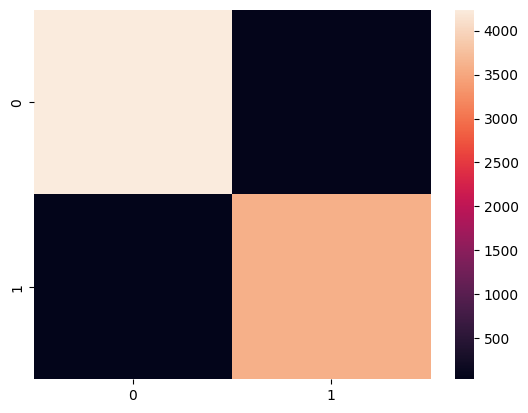

In [ ]:
print(confusion_matrix(y_test,predicciones))
sns.heatmap(confusion_matrix(y_test, predicciones))

**Exportacion del modelo**





In [ ]:
import joblib

joblib.dump(randomforest, 'randomforest_model.pkl')

['randomforest_model.pkl']

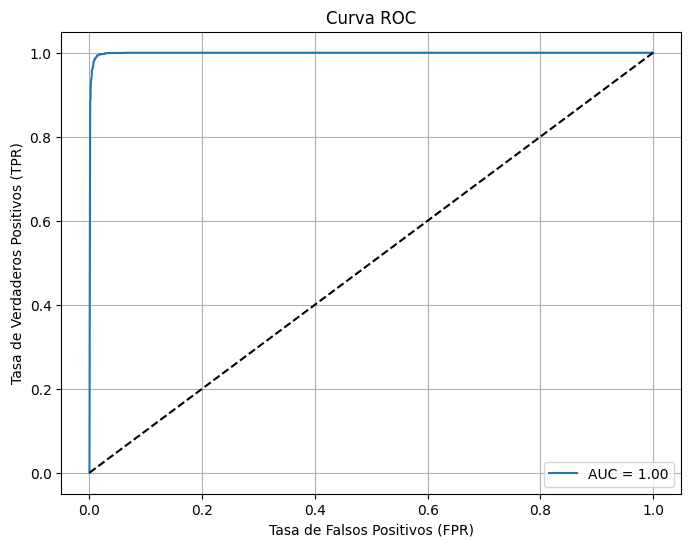

In [ ]:
# prompt: genrar curva roc del modelo

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción
y_pred_proba = randomforest.predict_proba(x_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**import joblib**: Importa la librería joblib, que proporciona herramientas para guardar y cargar objetos Python, incluyendo modelos de aprendizaje automático.


In [ ]:
import time
import sys
import resource
import os

# Evaluate inference time
start_time = time.time()
predictions_time = randomforest.predict(x_test)
end_time = time.time()
inference_time = end_time - start_time
print(f"Tiempo de inferencia: {inference_time:.4f} segundos")

# Evaluate memory consumption (approximate)
# This will give the size of the model object in bytes
model_memory = sys.getsizeof(randomforest)
print(f"Consumo de memoria del modelo (aproximado): {model_memory} bytes")

# Evaluate RAM usage
# Note: This gives the maximum resident set size in kilobytes
# The units might vary depending on the system (e.g., resource.RUSAGE_SELF)
ram_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
print(f"Uso de RAM (máximo): {ram_usage} KB")

# Evaluate disk space used by the model file
model_file_path = 'randomforest_model.pkl'
if os.path.exists(model_file_path):
    disk_space = os.path.getsize(model_file_path)
    print(f"Espacio en disco utilizado por el modelo: {disk_space} bytes")
else:
    print(f"El archivo del modelo '{model_file_path}' no fue encontrado.")

Tiempo de inferencia: 0.0411 segundos
Consumo de memoria del modelo (aproximado): 48 bytes
Uso de RAM (máximo): 279256 KB
Espacio en disco utilizado por el modelo: 5707369 bytes


In [ ]:
# Convertir bytes a megabytes (1 MB = 1024 * 1024 bytes)
disk_space_mb = disk_space / (1024 * 1024)
print(f"Espacio en disco utilizado por el modelo: {disk_space_mb:.2f} MB")

Espacio en disco utilizado por el modelo: 5.44 MB
